# TRAVAIL PRATIQUE 1 : HEURISTIQUES PVC


**Nom d'équipe : Equipe2**

**Membres d'équipe :**
1. Djelloul Oussama ***C.E***
2. Kedadsa Islam Chakib
3. Messar Cylia
4. Tagzirt Elissa
5. Sadi Lina
6. Bousba Neda
7. Tihami Mohamed Hicham

**Groupe : *SIQ1***

**Problème : *Voyageur de commerce***



----



# TRAVAIL DEMANDE

Concevoir une méthode efficace basée sur les heuristiques pour déterminer le chemin le plus court permettant à un voyageur de visiter toutes les villes d'un ensemble donné exactement une fois, en revenant au point de départ



----



# ***----------------------------Explication des Solutions adaptées----------------------------------***

# SOLUTIONS PAR CONSTRUCTION

## **Solution 1 : CHRISTOFIDES**

**0-Notre graphe initiale :**

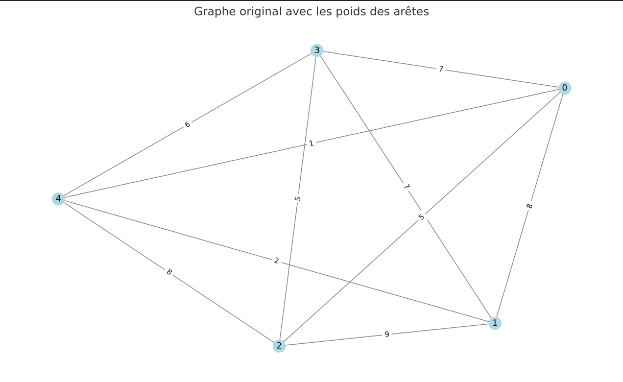


**1-Trouver un arbre couvrant minimum (T) du graphe (G):**

On commence par trouver un arbre couvrant minimum de notre graphe. Un arbre couvrant minimum est une sélection d'arêtes qui relie tous les sommets sans aucun cycle et avec le poids total minimum.

Pour notre cas notre arbre couvrant minimum est de poids total 13.

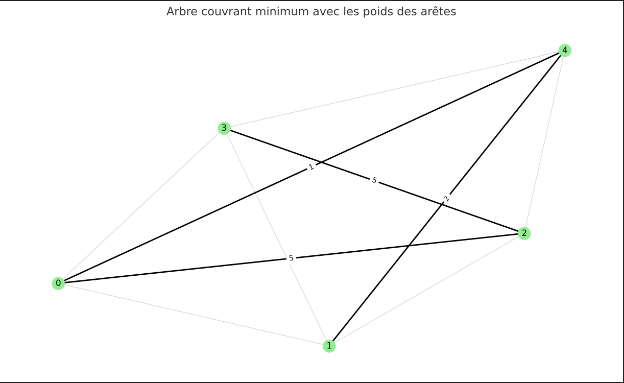


**2-Créer un ensemble (S) de sommets ayant un degré impair dans T:**

Ensuite, on identifie tous les sommets qui ont un nombre impair de connexions (un degré impair) dans l'arbre couvrant minimum.
 Dans le graphe donné, les sommets 1 et 3 ont été identifiés comme ayant un degré impair.

 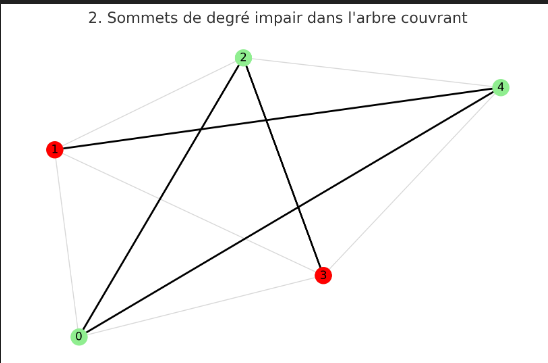


**3-Trouver un matching parfait de poids minimum dans le sous-graphe formé par les sommets de S:**

On cherche ensuite à connecter les sommets de degré et cela en trouvant un matching parfait, c'est-à-dire une manière de relier les sommets de degré impair par paires avec les arêtes de poids minimal.
Dans notre graphe, un matching de poids total 7 a été ajouté.

**4-Ajouter le matching M à l'arbre T pour former un nouveau multigraphe (C):**

On ajoute les arêtes du matching parfait à l'arbre couvrant minimum. Cela nous donne un multigraphe où tous les sommets ont un degré pair.

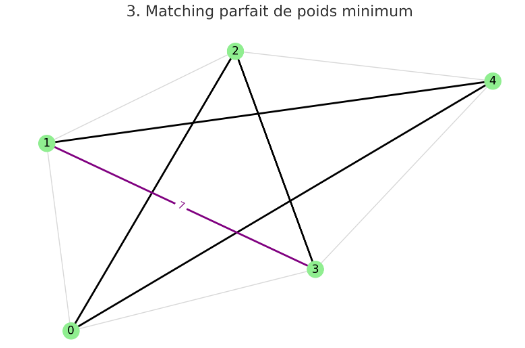

**5-Trouver un cycle eulérien dans le multigraphe C:**

Avec tous les sommets ayant maintenant un degré pair, on peut trouver un cycle eulérien, qui est un chemin qui passe exactement une fois par chaque arête du multigraphe.

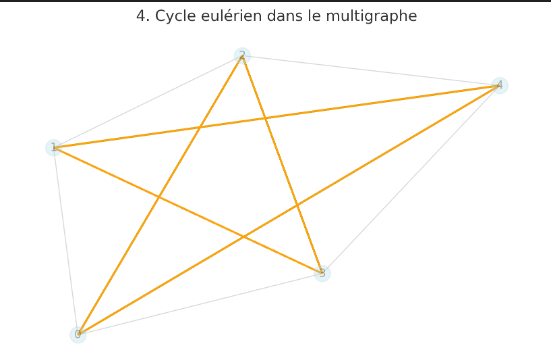


**6-Transformer le cycle eulérien en un circuit Hamiltonien:**

Enfin, on convertit le cycle eulérien en un circuit hamiltonien. On fait cela en "raccourcissant" le cycle eulérien, c'est-à-dire en sautant les sommets répétés, pour revenir directement au prochain sommet non visité.

## **Solution 2 : DOUBLE-ENDED NEAREST NEIGHBOUR**

Une variante de l'heuristique du voisin le plus proche où, au lieu de construire le chemin à partir d'un seul nœud de départ, deux nœuds de départ sont utilisés, un à chaque extrémité du chemin en cours de construction. Cette approche permet d'étendre le chemin simultanément à partir de ses deux extrémités, ce qui peut conduire à des solutions potentiellement meilleures ou plus équilibrées dans certains cas.

----

## **Solution 3 : NEAREST AND LONELIEST NEIGHBOUR**

Dans cette solution, nous proposons une variante de la solution PPV. Le principe général est que les villes les plus éloignées des autres devraient être accordées une certaine priorité dans la construction du circuit afin d'éviter leur inclusion ultérieure dans l'itinéraire à un coût plus élevé. Pour rendre cela possible, nous introduisons le concept de solitude d'une ville, calculée à partir de la distance moyenne de cette ville à toutes les autres. En combinaison avec la distance aux voisins les plus proches, la solitude des voisins les plus proches sera également un critère de sélection pour le prochain nœud à ajouter au circuit. Les voisins plus solitaires seront préférés aux autres. Dans une étape de prétraitement qui s'exécute en un temps négligeable, une nouvelle matrice de distances est obtenue de telle sorte que les nouvelles distances plus courtes d'une ville à d'autres sont une fonction pondérée de manière égale à la fois des distances anciennes plus courtes vers ces villes et d'une plus grande solitude de cette ville.

Nous pouvons resumer la soluion comme suit:
### **1-Prétraitement de la matrice de distances :**
* Calculer la distance de chaque ville à toutes les autres.

* Calculer le minimum, le maximum et la moyenne (entre les deux) des distances moyennes de chaque ville à toutes les autres.

* Calculer la symétrie de la distance de chaque ville à toutes les autres par rapport à la moyenne calculée à l'étape précédente (cela garantira qu'une plus grande solitude est récompensée par un coût plus court dans la matrice des distances). Conserver la matrice de ces valeurs symétriques.

* Calculer la nouvelle matrice de distances lorsque chaque nouvelle entrée est la moyenne entre la distance de la ville à son voisin et la solitude de ce voisin.

### **2-Algorithme principal :**
L'algorithme procède de la manière suivante, en travaillant avec la nouvelle matrice de distances :

* Trouver l'arête la plus courte et la prendre comme première arête du circuit, en sélectionnant l'un des deux nœuds comme nœud de départ.

* Ajouter au circuit le nœud le plus proche de l'extrémité du circuit, à condition que ce nœud ne fasse pas déjà partie du circuit.

* Continuer avec l'étape précédente jusqu'à ce que tous les nœuds fassent partie du circuit.

* Revenir au nœud de départ en l'ajoutant à la fin du circuit.

----

## **Solution 4 : DOUBLE-ENDED NEAREST AND LONELIEST NEIGHBOUR**

Cette variation est une extension de l'heuristique du voisin le plus proche et le plus solitaire. Dans cette approche, deux nœuds de départ sont utilisés, un à chaque extrémité du chemin en cours de construction. Comme dans l'approche "double-ended nearest neighbour", le chemin est étendu simultanément à partir de ses deux extrémités. Cependant, en plus de considérer la proximité des nœuds, cette heuristique prend également en compte le degré de solitude de chaque nœud, favorisant ainsi les nœuds les plus éloignés des autres lors de la construction du chemin. Cette combinaison vise à produire des solutions potentiellement meilleures en termes de qualité et d'équilibre.
Nous pouvons aussi resumer la soluion en 2 etapes:
### **1-Prétraitement de la matrice de distances :**
Cette etape sera la meme que la solution precedente.
### **2-Algorithme principal :**
* Trouver l'arête la plus courte et la prendre comme première arête du circuit.

*  Considérer les nœuds plus proches de chaque extrémité du circuit et ajouter au circuit celui qui est plus proche de l'extrémité respective du circuit, à condition que ce nœud ne fasse pas déjà partie du circuit.

*  Continuer avec l'étape précédente jusqu'à ce que tous les nœuds fassent partie du circuit.
* Revenir au nœud de départ en l'ajoutant à la fin du circuit.

# SOLUTIONS PAR AMELIORATION

### **Solution 2 : 2OPT INITIALISE AVEC CHRISTOFIDES**:



**Initialisation**: Tout d'abord, un itinéraire initial est défini. Cet itinéraire peut être obtenu à partir d'un algorithme de construction initial tel que l'algorithme de Christofides que vous utilisez dans votre code.

**Boucle d'amélioration** : L'algorithme 2-opt utilise une boucle pour tenter d'améliorer l'itinéraire initial. Cette boucle continue jusqu'à ce qu'aucune amélioration supplémentaire ne puisse être apportée.

**Exploration des paires de points** : À chaque itération de la boucle, l'algorithme parcourt toutes les paires de points dans l'itinéraire. Pour chaque paire de points (i, j) où i < j - 1 (pour éviter de relier des points adjacents), l'algorithme évalue le coût d'inversion de la section de l'itinéraire entre les points i et j.

**Inversion de l'itinéraire** : Si l'inversion de la section de l'itinéraire entre les points i et j entraîne une réduction du coût total de l'itinéraire, l'inversion est effectuée. Cela signifie que les points entre i et j sont parcourus dans l'ordre inverse.

**Critère d'arrêt** : L'algorithme continue à parcourir les paires de points et à inverser les sections de l'itinéraire jusqu'à ce qu'aucune amélioration supplémentaire ne puisse être réalisée. À ce stade, l'algorithme se termine et renvoie l'itinéraire optimisé.

In [ ]:
def calculate_distance(city1, city2, adjacency_matrix):
    """Calculates the distance between two cities using the adjacency matrix."""
    return adjacency_matrix[city1][city2]

def two_opt(adjacency_matrix, route):

    """Performs the 2-opt algorithm to improve a given route."""
    improvement = True
    while improvement:
        improvement = False
        for i in range(len(route) - 2):
            for j in range(i + 2, len(route)):
                if i == 0 and j == len(route) - 1:
                    continue  # Skip swapping start and end points

                current_distance = calculate_distance(route[i], route[i + 1], adjacency_matrix) + calculate_distance(route[j], route[(j + 1) % len(route)], adjacency_matrix)
                new_distance = calculate_distance(route[i], route[j], adjacency_matrix) + calculate_distance(route[i + 1], route[(j + 1) % len(route)], adjacency_matrix)

                if new_distance < current_distance:
                    route[i + 1 : j + 1] = route[j : i : -1]  # Reverse the sub-route
                    improvement = True
    return route


## variable matrice est matrice adjecent.
circuit, total_cost  = christofides_algorithm(G)
initial_route = circuit
start_time = time.time()

optimized_route = two_opt(matrix, initial_route)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed Time: {elapsed_time} seconds")
print("Optimized route:", optimized_route)


def evalue_path(curr_path, distance_matrix):
    distance = 0
    for i in range(len(curr_path) - 1):
        if curr_path[i + 1] == -1:
            break
        distance += distance_matrix[curr_path[i]][curr_path[i + 1]]
    return distance


print("cout ", evalue_path(optimized_route, matrix))


# ***-----------------------------------------Implementation----------------------------------***

# Lecture de fichier XML (Changer N pour nb villes)

In [1]:
import xml.etree.ElementTree as ET
import numpy as np

def read_tsp_xml(filename):
    # Parse XML file
    tree = ET.parse(filename)
    root = tree.getroot()

    # Find all vertices in the XML
    vertices = root.findall('.//vertex')

    # Determine the number of vertices
    num_vertices = len(vertices)

    # Initialize adjacency matrix
    distance_matrix = np.zeros((num_vertices, num_vertices))

    # Extract edge information and construct adjacency matrix
    for vertex_index, vertex in enumerate(vertices):
        edges = vertex.findall('edge')
        for edge in edges:
            neighbor_index = int(edge.text)  # Extract the neighbor vertex index
            cost = float(edge.attrib['cost'])  # Extract the cost of the edge
            distance_matrix[vertex_index][neighbor_index] = cost

    return distance_matrix

filename = "eil76.xml"
distance_matrix = read_tsp_xml(filename)


# SOLUTIONS PAR CONSTRUCTION

### **Solution 1 : CHRISTOFIDES**

In [ ]:
# Build Graph first
import networkx as nx

def build_graph_from_distance_matrix(distance_matrix):
    G = nx.Graph()
    for i in range(len(distance_matrix)):
        for j in range(i + 1, len(distance_matrix)):
            G.add_edge(i, j, weight=distance_matrix[i][j])
    return G

## matrice de test :
matrix = [
[0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
[10, 0, 25, 35, 15, 20, 30, 5, 40, 35, 45, 50, 55, 60, 65, 70],
[15, 25, 0, 5, 10, 30, 40, 15, 25, 30, 20, 45, 30, 35, 40, 50],
[20, 35, 5, 0, 40, 25, 15, 10, 20, 45, 30, 35, 40, 50, 55, 60],
[25, 15, 10, 40, 0, 20, 10, 25, 30, 35, 50, 55, 60, 65, 70, 75],
[30, 20, 30, 25, 20, 0, 35, 30, 5, 15, 40, 45, 50, 55, 60, 65],
[35, 30, 40, 15, 10, 35, 0, 20, 25, 30, 45, 60, 65, 70, 75, 80],
[40, 5, 15, 10, 25, 30, 20, 0, 35, 40, 55, 35, 40, 45, 50, 55],
[45, 40, 25, 20, 30, 5, 25, 35, 0, 15, 10, 25, 30, 35, 40, 45],
[50, 35, 30, 45, 35, 15, 30, 40, 15, 0, 25, 20, 15, 20, 25, 30],
[55, 45, 20, 30, 50, 40, 45, 55, 10, 25, 0, 15, 30, 35, 40, 45],
[60, 50, 45, 35, 55, 45, 60, 35, 25, 20, 15, 0, 10, 15, 20, 25],
[65, 55, 30, 40, 60, 50, 65, 40, 30, 15, 30, 10, 0, 25, 30, 35],
[70, 60, 35, 50, 65, 55, 70, 45, 35, 20, 35, 15, 25, 0, 10, 15],
[75, 65, 40, 55, 70, 60, 75, 50, 40, 25, 40, 20, 30, 10, 0, 5],
[80, 70, 50, 60, 75, 65, 80, 55, 45, 30, 45, 25, 35, 15, 5, 0]
]

G = build_graph_from_distance_matrix(distance_matrix)

In [ ]:
import networkx as nx
import numpy as np
import time
from scipy.spatial import distance_matrix
from networkx.algorithms.matching import min_weight_matching
from networkx.algorithms.tree.mst import minimum_spanning_tree
import heapq
from xml.etree import ElementTree as ET



def christofides_algorithm(G):
    # Trouver un arbre couvrant minimal
    T = nx.minimum_spanning_tree(G, weight='weight')

    # Trouver les sommets de degré impair dans l'arbre couvrant minimal
    odd_degree_nodes = [node for node in T.nodes() if T.degree(node) % 2 == 1]

    # Restreindre le graphe aux sommets de degré impair
    odd_graph = G.subgraph(odd_degree_nodes)

    # Trouver un matching parfait de poids minimum dans le graphe restreint
    matching = min_weight_matching(odd_graph)

    # Ajouter le matching à l'arbre couvrant minimal pour obtenir un multigraphe
    multigraph = nx.MultiGraph(T)
    for edge in matching:
        multigraph.add_edge(edge[0], edge[1], weight=G[edge[0]][edge[1]]['weight'])

    # Trouver un circuit Eulerien dans le multigraphe
    eulerian_circuit = list(nx.eulerian_circuit(multigraph))

    # Convertir le circuit Eulerien en un circuit Hamiltonien et calculer le coût
    visited = set()
    hamiltonian_circuit = []
    total_cost = 0
    last_node = None
    #print(eulerian_circuit)
    for u, v in eulerian_circuit:
        if u not in visited:
            if last_node is not None:
                total_cost += G[last_node][u]['weight']
            visited.add(u)
            hamiltonian_circuit.append(u)
            last_node = u
        if v not in visited:
            if last_node is not None:
                total_cost += G[last_node][v]['weight']
            visited.add(v)
            hamiltonian_circuit.append(v)
            last_node = v
    # Ajouter le coût pour retourner au point de départ
    # Ajouter le coût pour retourner au point de départ pour former un cycle
    if hamiltonian_circuit:
        start_node = hamiltonian_circuit[0]
        end_node = hamiltonian_circuit[-1]
        if start_node != end_node:
            hamiltonian_circuit.append(start_node)
            total_cost += G[end_node][start_node]['weight']

    return hamiltonian_circuit, total_cost



# Exemple d'utilisation :
# G doit être défini comme un graphe pondéré NetworkX
# start_node est le nœud de départ
start_time = time.time()
start_node = 0
circuit, total_cost = christofides_algorithm(G)
end_time = time.time()

execution_time = end_time - start_time
print("Circuit Hamiltonien :", circuit)
print("Coût total :", total_cost)
print("Temps d'exécution :", execution_time, "secondes")

Circuit Hamiltonien : [0, 228, 138, 201, 230, 67, 141, 231, 69, 107, 243, 114, 144, 208, 98, 154, 75, 153, 86, 187, 257, 94, 33, 181, 27, 155, 259, 238, 34, 183, 191, 143, 217, 118, 93, 150, 246, 85, 148, 87, 49, 76, 90, 92, 160, 178, 127, 47, 195, 22, 173, 142, 13, 97, 116, 239, 106, 211, 44, 186, 45, 215, 62, 199, 179, 151, 245, 207, 250, 198, 43, 164, 221, 84, 104, 131, 96, 28, 226, 19, 108, 109, 59, 157, 133, 158, 146, 244, 200, 77, 258, 174, 46, 126, 39, 23, 16, 54, 167, 65, 102, 112, 79, 193, 196, 41, 9, 237, 130, 213, 202, 56, 10, 240, 234, 81, 223, 162, 249, 124, 63, 68, 176, 236, 61, 248, 156, 224, 222, 42, 121, 37, 255, 55, 241, 38, 101, 218, 74, 161, 58, 180, 170, 168, 242, 51, 14, 232, 175, 135, 225, 31, 66, 50, 40, 209, 177, 91, 254, 251, 110, 235, 119, 21, 36, 5, 15, 83, 134, 145, 117, 2, 122, 7, 189, 111, 165, 206, 197, 203, 53, 260, 172, 26, 194, 1, 169, 147, 25, 113, 252, 100, 192, 12, 166, 88, 247, 188, 105, 120, 152, 8, 229, 57, 182, 149, 35, 219, 82, 216, 205, 64, 5

### **Solution 2 :DOUBLE-ENDED NEAREST NEIGHBOUR**

In [ ]:
import math
import random
import time



def double_ended_nearest_neighbor(num_cities, distances):
    visited = [False] * num_cities
    tour = []

    # Step 1: Find the shortest edge and take it as the first tour edge
    min_distance = float('inf')
    start_city = 0
    tour.append(start_city)
    visited[start_city] = True

    for i in range(num_cities):
            if not visited[i] and distances[start_city][i] < min_distance:
                min_distance = distances[start_city][i]
                next_city = i

    tour.append(next_city)
    visited[next_city] = True

    while len(tour) < num_cities:
        # Step 2: Consider the nodes closer to each of the route’s ends
        # and add to the tour the one closer to the respective endpoint
        start_min_distance = float('inf')
        end_min_distance = float('inf')
        start_city = None
        end_city = None

        for i in range(num_cities):
            if not visited[i]:
                if distances[i][tour[0]] < start_min_distance:
                    start_min_distance = distances[i][tour[0]]
                    start_city = i
                if distances[i][tour[-1]] < end_min_distance:
                    end_min_distance = distances[i][tour[-1]]
                    end_city = i

        # Choose the closer city and add it to the tour
        if start_min_distance <= end_min_distance:
            tour.insert(0, start_city)
            visited[start_city] = True
        else:
            tour.append(end_city)
            visited[end_city] = True

    # Step 4: Return to the starting node by adding it to the end of the route
    tour.append(tour[0])

    return tour


def calculate_tour_cost(tour, distances):
    cost = 0
    for i in range(len(tour) - 1):
        cost += distances[tour[i]][tour[i + 1]]
    return cost


# Example usage
# NumberofCities = len(distances)

start_time = time.time()
tour = double_ended_nearest_neighbor(262, distance_matrix)  # Assuming starting city is 0
end_time = time.time()

# Display the elapsed time, the optimal tour, and the corresponding cost.
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")
print("Optimal Tour (Double-ended Nearest Neighbor):", tour)
print("Tour Cost (Double-ended Nearest Neighbor):", calculate_tour_cost(tour, distance_matrix))


Elapsed Time: 0.051880598068237305 seconds
Optimal Tour (Double-ended Nearest Neighbor): [151, 159, 6, 163, 139, 171, 185, 80, 3, 154, 75, 153, 86, 257, 187, 33, 94, 181, 27, 155, 118, 34, 238, 259, 143, 191, 183, 217, 246, 148, 85, 93, 150, 87, 49, 90, 76, 211, 44, 127, 178, 160, 186, 92, 45, 215, 179, 62, 199, 36, 189, 7, 2, 122, 117, 255, 55, 65, 16, 158, 146, 244, 126, 39, 23, 225, 135, 175, 232, 51, 168, 170, 180, 58, 161, 74, 218, 14, 101, 38, 37, 241, 234, 10, 240, 224, 42, 222, 121, 145, 134, 83, 15, 242, 5, 164, 221, 84, 104, 131, 96, 28, 226, 19, 108, 109, 59, 157, 133, 50, 66, 200, 31, 77, 258, 174, 54, 46, 167, 102, 112, 79, 193, 196, 41, 9, 237, 130, 213, 56, 202, 12, 166, 88, 105, 188, 120, 247, 152, 8, 169, 1, 194, 249, 68, 176, 236, 61, 248, 156, 81, 223, 162, 63, 124, 192, 100, 252, 113, 147, 25, 229, 149, 57, 182, 35, 219, 64, 205, 82, 216, 172, 26, 260, 53, 29, 17, 136, 256, 123, 48, 11, 132, 4, 190, 261, 78, 18, 184, 71, 32, 233, 253, 137, 20, 99, 114, 144, 208, 243

### **Solution 3 :NEAREST AND LONELIEST NEIGHBOUR**

In [ ]:
import math
import time


def calculate_loneliness(distances):
    distset = [sum(row) for row in distances]
    print(distset)
    min_distset = min(distset)
    max_distset = max(distset)
    average_distset = (max_distset + min_distset) / 2

    for i in range(len(distset)):
        if distset[i] > average_distset:
            distset[i] = average_distset - (distset[i] - average_distset)
        else:
            distset[i] = average_distset + (average_distset - distset[i])

    return distset

def create_new_distance_matrix(distances, lonliness):
    num_cities = len(distances)
    new_distances = [[0] * num_cities for _ in range(num_cities)]

    for i in range(num_cities):
        for j in range(num_cities):
            new_distances[i][j] = ((num_cities * distances[i][j]) + lonliness[j]) / 2

    return new_distances

def nearest_loneliest_neighbor(num_cities, distances):
    visited = [False] * num_cities
    tour = []

    # Step 1: Find the shortest edge and take it as the first tour edge
    min_distance = float('inf')
    start_city = None
    next_city = None

    for i in range(num_cities):
        for j in range(num_cities):
            if (i != j) and  (distances[i][j] < min_distance):
                min_distance = distances[i][j]
                start_city = i
                next_city = j

    tour.append(start_city)
    tour.append(next_city)
    visited[start_city] = True
    visited[next_city] = True

    current_city = next_city

    while len(tour) < num_cities:
        min_distance = float('inf')
        next_city = None

        # Step 2: Find the nearest and loneliest neighbor
        for i in range(num_cities):
            if not visited[i] and distances[current_city][i] < min_distance:
                min_distance = distances[current_city][i]
                next_city = i

        # Step 3: Add the nearest city to the tour
        tour.append(next_city)
        visited[next_city] = True
        current_city = next_city

    # Step 4: Return to the starting city
    tour.append(tour[0])

    return tour

def calculate_tour_cost(tour, distances):
    cost = 0
    for i in range(len(tour) - 1):
        cost += distances[tour[i]][tour[i+1]]
    return cost



distances =  distance_matrix

start_time = time.time()
#NumberofCities = len(distances)

#tour1 = nearest_neighbor(NumberofCities,distances)

# Step 2: Calculate loneliness of each city
lonliness = calculate_loneliness(distances)

# Step 3: Create new distance matrix
new_distances = create_new_distance_matrix(distances, lonliness)

# Step 4: Apply nearest and loneliest neighbor heuristic
tour = nearest_loneliest_neighbor(262, new_distances)

end_time = time.time()

# Affichage du temps d'exécution, du coût minimum trouvé et du chemin correspondant.
elapsed_time = end_time - start_time

print(f"Elapsed Time: {elapsed_time} seconds")
#print("Optimal Tour1:", tour1)
print("Optimal Tour:", tour)

# Calculate tour cost
tour_cost = calculate_tour_cost(tour, distances)
print("Tour Cost:", tour_cost)

[40047.648193664085, 25677.94250805276, 19615.327452738424, 25854.293967137004, 25773.743952159504, 20745.076623060766, 22306.65087750121, 19762.308411570666, 28726.625917606423, 26892.849915999996, 23671.354460454975, 26914.692073986913, 30309.680873471538, 28165.688927946325, 21562.46033455992, 20127.733926275763, 30763.895632644664, 24518.7534275371, 23420.36659207629, 28771.854230076093, 25141.652165620428, 23659.309491584303, 24724.39250841853, 30796.26083572595, 21137.3055996108, 27767.317487407687, 24320.821664329447, 26808.83495956846, 27858.792169745142, 24120.710873229626, 34071.55455041072, 26843.51122352384, 26491.25635859313, 28715.067439177135, 31061.052038744787, 29368.946869941698, 21094.897484439545, 22765.307451855635, 21657.614850494487, 32110.699999505006, 29649.506522948363, 29056.2715023054, 21878.63633617445, 22124.3116464616, 28637.031129745505, 26684.652611924233, 28556.960278292085, 25550.343549273886, 27705.758017214546, 31533.220664474982, 28251.689622699796

### **Solution 4 :DOUBLE-ENDED NEAREST AND LONELIEST NEIGHBOUR**

In [ ]:
import math
import time


def calculate_loneliness(distances):
    distset = [sum(row) for row in distances]
    min_distset = min(distset)
    max_distset = max(distset)
    average_distset = (max_distset + min_distset) / 2

    for i in range(len(distset)):
        if distset[i] > average_distset:
            distset[i] = average_distset - (distset[i] - average_distset)
        else:
            distset[i] = average_distset + (average_distset - distset[i])

    return distset


def double_ended_nearest_loneliest_neighbor(num_cities, distances):
    visited = [False] * num_cities
    tour = []

    # Step 1: Find the shortest edge and take it as the first tour edge
    min_distance = float('inf')
    start_city = None
    next_city = None

    for i in range(num_cities):
        for j in range(num_cities):
            if (i != j) and (distances[i][j] < min_distance):
                min_distance = distances[i][j]
                #print(i,j,min_distance)
                start_city = i
                next_city = j
    tour.append(start_city)
    tour.append(next_city)
    visited[start_city] = True
    visited[next_city] = True

    while len(tour) < num_cities:
        # Step 2: Consider the nodes closer to each of the route’s ends
        # and add to the tour the one closer to the respective endpoint
        start_min_distance = float('inf')
        end_min_distance = float('inf')
        start_city = None
        end_city = None

        for i in range(num_cities):
            if not visited[i]:
                if distances[i][tour[0]] < start_min_distance:
                    start_min_distance = distances[i][tour[0]]
                    start_city = i
                if distances[i][tour[-1]] < end_min_distance:
                    end_min_distance = distances[i][tour[-1]]
                    end_city = i

        # Choose the closer city and add it to the tour
        if start_min_distance <= end_min_distance:
            tour.insert(0, start_city)
            visited[start_city] = True
        else:
            tour.append(end_city)
            visited[end_city] = True

    # Step 4: Return to the starting node by adding it to the end of the route
    tour.append(tour[0])

    return tour

def create_new_distance_matrix(distances, lonliness):
    num_cities = len(distances)
    new_distances = [[0] * num_cities for _ in range(num_cities)]

    for i in range(num_cities):
        for j in range(num_cities):
            new_distances[i][j] = ((num_cities * distances[i][j]) + lonliness[j]) / 2

    return new_distances

def calculate_tour_cost(tour, distances):
    cost = 0
    for i in range(len(tour) - 1):
        cost += distances[tour[i]][tour[i + 1]]
    return cost


# Assuming distances is defined elsewhere
start_time = time.time()
distances =  distance_matrix
#NumberofCities = len(distances)

# Step 2: Calculate loneliness of each city
loneliness = calculate_loneliness(distances)

# Step 3: Modify distances based on loneliness
new_distances = create_new_distance_matrix(distances,loneliness)

# Step 4: Apply double-ended nearest and loneliest neighbor heuristic
tour = double_ended_nearest_loneliest_neighbor(76, new_distances)

end_time = time.time()

# Display the elapsed time, the optimal tour, and the corresponding cost.
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")
print("Optimal Tour:", tour)

# Calculate tour cost
tour_cost = calculate_tour_cost(tour, distances)
print("Tour Cost:", tour_cost)


Elapsed Time: 0.0053272247314453125 seconds
Optimal Tour: [3, 1, 29, 47, 14, 56, 12, 53, 18, 13, 52, 6, 34, 7, 45, 33, 51, 26, 44, 28, 4, 36, 19, 69, 59, 70, 35, 46, 20, 73, 27, 61, 72, 32, 62, 15, 50, 5, 67, 74, 75, 66, 25, 11, 39, 16, 2, 43, 31, 8, 38, 71, 57, 9, 37, 64, 10, 65, 58, 30, 24, 49, 17, 23, 48, 22, 55, 40, 41, 42, 0, 21, 60, 68, 63, 54, 3]
Tour Cost: 698.803774529646


# SOLUTIONS PAR AMELIORATION

### **Solution : 2OPT INITIALISE AVEC CHRISTOFIDES**

In [ ]:
import networkx as nx
import numpy as np
import time
from scipy.spatial import distance_matrix
from networkx.algorithms.matching import min_weight_matching
from networkx.algorithms.tree.mst import minimum_spanning_tree
import heapq
from xml.etree import ElementTree as ET


def christofides_algorithm(G):
    # Trouver un arbre couvrant minimal
    T = nx.minimum_spanning_tree(G, weight='weight')

    # Trouver les sommets de degré impair dans l'arbre couvrant minimal
    odd_degree_nodes = [node for node in T.nodes() if T.degree(node) % 2 == 1]

    # Restreindre le graphe aux sommets de degré impair
    odd_graph = G.subgraph(odd_degree_nodes)

    # Trouver un matching parfait de poids minimum dans le graphe restreint
    matching = min_weight_matching(odd_graph)

    # Ajouter le matching à l'arbre couvrant minimal pour obtenir un multigraphe
    multigraph = nx.MultiGraph(T)
    for edge in matching:
        multigraph.add_edge(edge[0], edge[1], weight=G[edge[0]][edge[1]]['weight'])

    # Trouver un circuit Eulerien dans le multigraphe
    eulerian_circuit = list(nx.eulerian_circuit(multigraph))

    # Convertir le circuit Eulerien en un circuit Hamiltonien et calculer le coût
    visited = set()
    hamiltonian_circuit = []
    total_cost = 0
    last_node = None
    #print(eulerian_circuit)
    for u, v in eulerian_circuit:
        if u not in visited:
            if last_node is not None:
                total_cost += G[last_node][u]['weight']
            visited.add(u)
            hamiltonian_circuit.append(u)
            last_node = u
        if v not in visited:
            if last_node is not None:
                total_cost += G[last_node][v]['weight']
            visited.add(v)
            hamiltonian_circuit.append(v)
            last_node = v
    # Ajouter le coût pour retourner au point de départ
    # Ajouter le coût pour retourner au point de départ pour former un cycle
    if hamiltonian_circuit:
        start_node = hamiltonian_circuit[0]
        end_node = hamiltonian_circuit[-1]
        if start_node != end_node:
            hamiltonian_circuit.append(start_node)
            total_cost += G[end_node][start_node]['weight']

    return hamiltonian_circuit, total_cost



def calculate_distance(city1, city2, adjacency_matrix):
    """Calculates the distance between two cities using the adjacency matrix."""
    return adjacency_matrix[city1][city2]

def two_opt(adjacency_matrix, route):

    """Performs the 2-opt algorithm to improve a given route."""
    improvement = True
    while improvement:
        improvement = False
        for i in range(len(route) - 2):
            for j in range(i + 2, len(route)):
                if i == 0 and j == len(route) - 1:
                    continue  # Skip swapping start and end points

                current_distance = calculate_distance(route[i], route[i + 1], adjacency_matrix) + calculate_distance(route[j], route[(j + 1) % len(route)], adjacency_matrix)
                new_distance = calculate_distance(route[i], route[j], adjacency_matrix) + calculate_distance(route[i + 1], route[(j + 1) % len(route)], adjacency_matrix)

                if new_distance < current_distance:
                    route[i + 1 : j + 1] = route[j : i : -1]  # Reverse the sub-route
                    improvement = True
    return route


start_time = time.time()
circuit, total_cost  = christofides_algorithm(G)
initial_route = circuit


optimized_route = two_opt(distance_matrix, initial_route)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed Time: {elapsed_time} seconds")
print("Optimized route:", optimized_route)


def evalue_path(curr_path, distance_matrix):
    distance = 0
    for i in range(len(curr_path) - 1):
        if curr_path[i + 1] == -1:
            break
        distance += distance_matrix[curr_path[i]][curr_path[i + 1]]
    return distance


print("cout ", evalue_path(optimized_route, distance_matrix))



TypeError: 'function' object is not subscriptable

# **TABLEAU DE TEST**

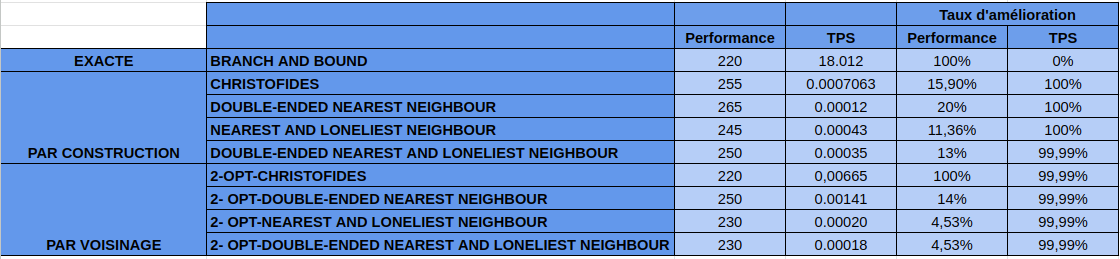